### CORDEX INPUT HEAT MAPS

In [2]:
import xarray
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import warnings

%matplotlib inline

# Add a couple of deep down individual functions.
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator
import cmasher as cmr
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter

In [3]:
def get_cordex_addresses():
    models = pd.read_csv('cordex_models.txt', sep='\t')

    # Getting file strings:
        # Directories:
    root = '/data/met/ukcordex/'
    directories = [root + models['GCM'][i] + '/' +
                   models['RCM'][i] + '/' +
                   models['Ensemble'][i] + '/dmo/'
                   for i in range(models.shape[0])]

        # Filenames:
    #feat. clunky for loops and error handling!
    tas_files  = []
    hurs_files = []
    pr_files   = []
    wind_files = []
    err_indexs = []
    print(type(err_indexs))
    for i in range(models.shape[0]):
        try:
            for f_name in os.listdir(directories[i]):
                if f_name.startswith('tas_'):
                    tas_files.append(str(f_name))
                if f_name.startswith('hurs_'):
                    hurs_files.append(str(f_name))
                if f_name.startswith('sfcWind_'):
                    wind_files.append(str(f_name))
                if f_name.startswith('pr_'):
                    pr_files.append(str(f_name))

        except OSError as error:
            print(f'Inelligible directory at: {directories[i]}')
            err_indexs.append(int(i))


    for i in range(len(err_indexs)):
        del directories[err_indexs[i]]
    
    return directories,tas_files,hurs_files,wind_files,pr_files

In [7]:
# Getting data location
directories,tas_files,hurs_files,wind_files,pr_files = get_cordex_addresses()

<class 'list'>


In [8]:
i = 1
tas_data  = xarray.open_dataset(directories[i] + tas_files[i], engine = "netcdf4")
years = np.array(pd.to_datetime(np.array(tas_data.time)).year)
months = np.array(pd.to_datetime(np.array(tas_data.time)).month)
#1981-2000 summer indices: (First 20 years of run)
year_inds = np.where(years <= 2000)
summer_inds=np.concatenate((np.where(months == 6)[0],
                            np.where(months == 7)[0],
                            np.where(months == 8)[0]),
                            axis = 0)
indices_80to00 = np.intersect1d(year_inds,summer_inds)
#2061-2080 summer indices: (Last 20 years of run)
year_inds = np.where(years >= 2061)
summer_inds=np.concatenate((np.where(months == 6)[0],
                            np.where(months == 7)[0],
                            np.where(months == 8)[0]),
                            axis = 0)
indices_60to80 = np.intersect1d(year_inds,summer_inds)
del tas_data,years,months,year_inds,summer_inds

In [9]:
# Getting data for periods: 1980-2000 and 2060-1980
i = 1

print(f'Stage {i}')
tas_data  = xarray.open_dataset(directories[i] + tas_files[i], engine = "netcdf4")
tas_80to00 = np.array(tas_data.tas[indices_80to00,:,:]) - 273.15
tas_60to80 = np.array(tas_data.tas[indices_60to80,:,:]) - 273.15

hurs_data  = xarray.open_dataset(directories[i] + hurs_files[i], engine = "netcdf4")
hurs_80to00 = np.array(hurs_data.hurs[indices_80to00,:,:])
hurs_60to80 = np.array(hurs_data.hurs[indices_60to80,:,:])

wind_data  = xarray.open_dataset(directories[i] + wind_files[i], engine = "netcdf4")
wind_80to00 = np.array(wind_data.sfcWind[indices_80to00,:,:])*3.6
wind_60to80 = np.array(wind_data.sfcWind[indices_60to80,:,:])*3.6

pr_data  = xarray.open_dataset(directories[i] + pr_files[i], engine = "netcdf4")
pr_80to00 = np.array(pr_data.pr[indices_80to00,:,:])*86400
pr_60to80 = np.array(pr_data.pr[indices_60to80,:,:])*86400


for i in range(2,len(directories)):
    print(f'Stage {i}')
    
    temp1 = np.array(tas_data.tas[indices_80to00,:,:]) - 273.15
    tas_80to00 = np.append(tas_80to00,temp1,axis=0)
    temp2 = np.array(tas_data.tas[indices_60to80,:,:]) - 273.15
    tas_60to80 = np.append(tas_60to80,temp2,axis=0)
    
    hurs1 = np.array(hurs_data.hurs[indices_80to00,:,:])
    hurs_80to00 = np.append(hurs_80to00,hurs1,axis=0)
    hurs2 = np.array(hurs_data.hurs[indices_60to80,:,:])
    hurs_60to80 = np.append(hurs_60to80,hurs2,axis=0)
    
    wind1 = np.array(wind_data.sfcWind[indices_80to00,:,:])*3.6
    wind_80to00 = np.append(wind_80to00,wind1,axis=0)
    wind2 = np.array(wind_data.sfcWind[indices_60to80,:,:])*3.6
    wind_60to80 = np.append(wind_60to80,wind2,axis=0)
    
    pr1 = np.array(pr_data.pr[indices_80to00,:,:])*86400
    pr_80to00 = np.append(pr_80to00,pr1,axis=0)
    pr2 = np.array(pr_data.pr[indices_60to80,:,:])*86400
    pr_60to80 = np.append(pr_60to80,pr2,axis=0)
    
    del temp1,temp2,hurs1,hurs2,wind1,wind2,pr1,pr2

Stage 1
Stage 2
Stage 3
Stage 4
Stage 5
Stage 6
Stage 7
Stage 8
Stage 9
Stage 10
Stage 11
Stage 12
Stage 13
Stage 14
Stage 15
Stage 16
Stage 17
Stage 18
Stage 19
Stage 20
Stage 21
Stage 22
Stage 23
Stage 24
Stage 25
Stage 26
Stage 27
Stage 28
Stage 29
Stage 30
Stage 31
Stage 32
Stage 33
Stage 34
Stage 35
Stage 36
Stage 37
Stage 38
Stage 39
Stage 40
Stage 41
Stage 42
Stage 43
Stage 44
Stage 45
Stage 46
Stage 47
Stage 48


In [10]:
# Making mean over models data
tas_mean_80to00 = np.mean(tas_80to00,axis=0)
tas_mean_60to80 = np.mean(tas_60to80,axis=0)

hurs_mean_80to00 = np.mean(hurs_80to00,axis=0)
hurs_mean_60to80 = np.mean(hurs_60to80,axis=0)

wind_mean_80to00 = np.mean(wind_80to00,axis=0)
wind_mean_60to80 = np.mean(wind_60to80,axis=0)

pr_mean_80to00 = np.mean(pr_80to00,axis=0)
pr_mean_60to80 = np.mean(pr_60to80,axis=0)

In [11]:
# Making max over models data
tas_max_80to00 = np.max(tas_80to00,axis=0)
tas_max_60to80 = np.max(tas_60to80,axis=0)

hurs_max_80to00 = np.max(hurs_80to00,axis=0)
hurs_max_60to80 = np.max(hurs_60to80,axis=0)

wind_max_80to00 = np.max(wind_80to00,axis=0)
wind_max_60to80 = np.max(wind_60to80,axis=0)

pr_max_80to00 = np.max(pr_80to00,axis=0)
pr_max_60to80 = np.max(pr_60to80,axis=0)

In [12]:
# Making min over models data
tas_min_80to00 = np.min(tas_80to00,axis=0)
tas_min_60to80 = np.min(tas_60to80,axis=0)

hurs_min_80to00 = np.min(hurs_80to00,axis=0)
hurs_min_60to80 = np.min(hurs_60to80,axis=0)

wind_min_80to00 = np.min(wind_80to00,axis=0)
wind_min_60to80 = np.min(wind_60to80,axis=0)

pr_min_80to00 = np.min(pr_80to00,axis=0)
pr_min_60to80 = np.min(pr_60to80,axis=0)

In [13]:
del pr_60to80,pr_80to00
del tas_60to80,tas_80to00
del wind_60to80,wind_80to00
del hurs_60to80,hurs_80to00

In [14]:
region_data  = xarray.open_dataset('/home/theo/data/ukcp18-uk-land-region-rll.nc')
region_mask = region_data.admin_region
region_mask = np.nan_to_num(region_mask)
mask = np.logical_not(region_mask == 0)

In [15]:
print('tas')
print(np.unique((tas_mean_80to00*mask)[5:115,20:85]))
print(np.unique((tas_mean_60to80*mask)[5:115,20:85]))
print('hurs')
print(np.unique((hurs_mean_80to00*mask)[5:115,20:85]))
print(np.unique((hurs_mean_60to80*mask)[5:115,20:85]))
print('wind')
print(np.unique((wind_mean_80to00*mask)[5:115,20:85]))
print(np.unique((wind_mean_60to80*mask)[5:115,20:85]))
print('pr')
print(np.unique((pr_mean_80to00*mask)[5:115,20:85]))
print(np.unique((pr_mean_60to80*mask)[5:115,20:85]))

tas
[ 0.       10.455476 10.556907 ... 18.598871 18.724174 18.828762]
[ 0.       13.152154 13.290084 ... 21.721666 21.836462 21.988323]
hurs
[ 0.       60.78303  61.978313 ... 85.96807  85.97824  86.49587 ]
[ 0.       55.95221  57.319244 ... 86.11418  86.17457  86.34192 ]
wind
[ 0.        8.573599  8.591511 ... 23.838196 23.892982 24.097212]
[ 0.        8.276719  8.290313 ... 22.86534  23.118382 23.2596  ]
pr
[0.         1.47010836 1.61358922 ... 6.08181086 6.11205688 6.17144081]
[0.         1.14403254 1.28451535 ... 6.88803847 6.9053652  7.11262787]


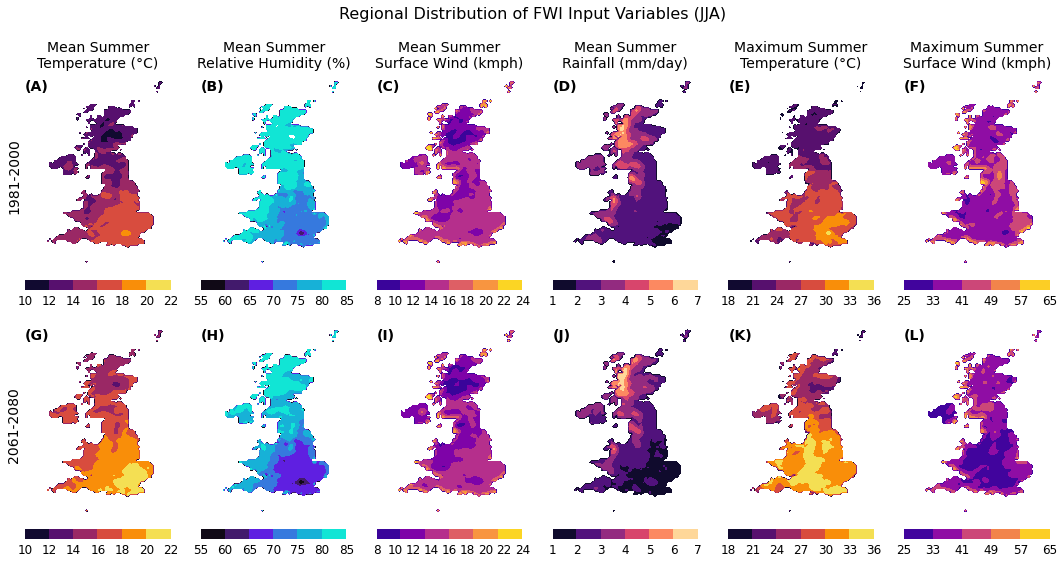

In [31]:
# Mean plots:
fig, axs = plt.subplots(2,6)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Regional Distribution of FWI Input Variables (JJA)', fontsize=16)


levels = np.linspace(10, 22, 6+1)
axs[0,0].set_title('Mean Summer\nTemperature (°C)',fontsize=14)
data00 = (tas_mean_80to00*mask)[5:115,20:85]
c00 = axs[0,0].contourf(data00,cmap=plt.get_cmap('inferno'),levels=levels)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['bottom'].set_visible(False)
axs[0,0].spines['left'].set_visible(False)
axs[0,0].get_xaxis().set_ticks([])
axs[0,0].get_yaxis().set_ticks([])
axs[0,0].set_ylabel('1981-2000',fontsize=14)
axs[0,0].text(0,100, '(A)', size=14,weight='bold')
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb00 = fig.colorbar(c00, cax=cax, orientation='horizontal')
cb00.outline.set_visible(False)
cb00.ax.tick_params(length=0,labelsize=12)
cb00.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb00.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data01 = (tas_mean_60to80*mask)[5:115,20:85]
c01 = axs[1,0].contourf(data01,cmap=plt.get_cmap('inferno'),levels=levels)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['bottom'].set_visible(False)
axs[1,0].spines['left'].set_visible(False)
axs[1,0].get_xaxis().set_ticks([])
axs[1,0].get_yaxis().set_ticks([])
axs[1,0].set_ylabel('2061-2080',fontsize=14)
axs[1,0].text(0,100, '(G)', size=14,weight='bold')
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb01 = fig.colorbar(c01, cax=cax, orientation='horizontal')
cb01.outline.set_visible(False)
cb01.ax.tick_params(length=0,labelsize=12)
cb01.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb01.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


levels = np.linspace(55, 85, 6+1)
axs[0,1].set_title('Mean Summer\nRelative Humidity (%)',fontsize=14)
data10 = (hurs_mean_80to00*mask)[5:115,20:85]
c10 = axs[0,1].contourf(data10,cmap=plt.get_cmap('cmr.cosmic'),levels=levels)
axs[0,1].text(0,100, '(B)', size=14,weight='bold')
axs[0,1].axis('off')
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb10 = fig.colorbar(c10, cax=cax, orientation='horizontal')
cb10.outline.set_visible(False)
cb10.ax.tick_params(length=0,labelsize=12)
data11 = (hurs_mean_60to80*mask)[5:115,20:85]
c11 = axs[1,1].contourf(data11,cmap=plt.get_cmap('cmr.cosmic'),levels=levels)
axs[1,1].text(0,100, '(H)', size=14,weight='bold')
axs[1,1].axis('off')
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb11 = fig.colorbar(c11, cax=cax, orientation='horizontal')
cb11.outline.set_visible(False)
cb11.ax.tick_params(length=0,labelsize=12)



levels = np.linspace(8, 24, 6+1)
axs[0,2].set_title('Mean Summer\nSurface Wind (kmph)',fontsize=14)
data20 = (wind_mean_80to00*mask)[5:115,20:85]
c20 = axs[0,2].contourf(data20,cmap=plt.get_cmap('plasma'),levels=levels)
axs[0,2].text(0,100, '(C)', size=14,weight='bold')
axs[0,2].axis('off')
divider = make_axes_locatable(axs[0,2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb20 = fig.colorbar(c20, cax=cax, orientation='horizontal')
cb20.outline.set_visible(False)
cb20.ax.tick_params(length=0,labelsize=12)
cb20.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb20.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data21 = (wind_mean_60to80*mask)[5:115,20:85]
c21 = axs[1,2].contourf(data21,cmap=plt.get_cmap('plasma'),levels=levels)
axs[1,2].text(0,100, '(I)', size=14,weight='bold')
axs[1,2].axis('off')
divider = make_axes_locatable(axs[1,2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb21 = fig.colorbar(c21, cax=cax, orientation='horizontal')
cb21.outline.set_visible(False)
cb21.ax.tick_params(length=0,labelsize=12)
cb21.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb21.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


levels = np.linspace(1, 7, 6+1)
axs[0,3].set_title('Mean Summer\nRainfall (mm/day)',fontsize=14)
data30 = (pr_mean_80to00*mask)[5:115,20:85]
c30 = axs[0,3].contourf(data30,cmap=plt.get_cmap('magma'),levels=levels)
axs[0,3].text(0,100, '(D)', size=14,weight='bold')
axs[0,3].axis('off')
divider = make_axes_locatable(axs[0,3])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb30 = fig.colorbar(c30, cax=cax, orientation='horizontal')
cb30.outline.set_visible(False)
cb30.ax.tick_params(length=0,labelsize=12)
cb30.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb30.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data31 = (pr_mean_60to80*mask)[5:115,20:85]
c31 = axs[1,3].contourf(data31,cmap=plt.get_cmap('magma'),levels=levels)
axs[1,3].text(0,100, '(J)', size=14,weight='bold')
axs[1,3].axis('off')
divider = make_axes_locatable(axs[1,3])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb31 = fig.colorbar(c31, cax=cax, orientation='horizontal')
cb31.outline.set_visible(False)
cb31.ax.tick_params(length=0,labelsize=12)
cb31.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb31.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


levels = np.linspace(18, 36, 6+1)
axs[0,4].set_title('Maximum Summer\nTemperature (°C)',fontsize=14)
data40 = (tas_max_80to00*mask)[5:115,20:85]
c40 = axs[0,4].contourf(data40,cmap=plt.get_cmap('inferno'),levels=levels)
axs[0,4].spines['top'].set_visible(False)
axs[0,4].spines['right'].set_visible(False)
axs[0,4].spines['bottom'].set_visible(False)
axs[0,4].spines['left'].set_visible(False)
axs[0,4].get_xaxis().set_ticks([])
axs[0,4].get_yaxis().set_ticks([])
axs[0,4].text(0,100, '(E)', size=14,weight='bold')
divider = make_axes_locatable(axs[0,4])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb40 = fig.colorbar(c40, cax=cax, orientation='horizontal')
cb40.outline.set_visible(False)
cb40.ax.tick_params(length=0,labelsize=12)
data41 = (tas_max_60to80*mask)[5:115,20:85]
c41 = axs[1,4].contourf(data41,cmap=plt.get_cmap('inferno'),levels=levels)
axs[1,4].spines['top'].set_visible(False)
axs[1,4].spines['right'].set_visible(False)
axs[1,4].spines['bottom'].set_visible(False)
axs[1,4].spines['left'].set_visible(False)
axs[1,4].get_xaxis().set_ticks([])
axs[1,4].get_yaxis().set_ticks([])
axs[1,4].text(0,100, '(K)', size=14,weight='bold')
divider = make_axes_locatable(axs[1,4])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb41 = fig.colorbar(c41, cax=cax, orientation='horizontal')
cb41.outline.set_visible(False)
cb41.ax.tick_params(length=0,labelsize=12)


levels = np.linspace(25, 65, 5+1)
axs[0,5].set_title('Maximum Summer\nSurface Wind (kmph)',fontsize=14)
data50 = (wind_max_80to00*mask)[5:115,20:85]
c50 = axs[0,5].contourf(data50,cmap=plt.get_cmap('plasma'),levels=levels)
axs[0,5].text(0,100, '(F)', size=14,weight='bold')
axs[0,5].axis('off')
divider = make_axes_locatable(axs[0,5])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb50 = fig.colorbar(c50, cax=cax, orientation='horizontal')
cb50.outline.set_visible(False)
cb50.ax.tick_params(length=0,labelsize=12)
data51 = (wind_max_60to80*mask)[5:115,20:85]
c51 = axs[1,5].contourf(data51,cmap=plt.get_cmap('plasma'),levels=levels)
axs[1,5].text(0,100, '(L)', size=14,weight='bold')
axs[1,5].axis('off')
divider = make_axes_locatable(axs[1,5])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb51 = fig.colorbar(c51, cax=cax, orientation='horizontal')
cb51.outline.set_visible(False)
cb51.ax.tick_params(length=0,labelsize=12)


plt.tight_layout(pad=1.5)
plt.savefig('/home/theo/final_images/1.1.images/input_maps')

In [17]:
print('tas')
print(np.unique((tas_max_80to00*mask)[5:115,20:85]))
print(np.unique((tas_max_60to80*mask)[5:115,20:85]))
print('hurs')
print(np.unique((hurs_max_80to00*mask)[5:115,20:85]))
print(np.unique((hurs_max_60to80*mask)[5:115,20:85]))
print('wind')
print(np.unique((wind_max_80to00*mask)[5:115,20:85]))
print(np.unique((wind_max_60to80*mask)[5:115,20:85]))
print('pr')
print(np.unique((pr_max_80to00*mask)[5:115,20:85]))
print(np.unique((pr_max_60to80*mask)[5:115,20:85]))

tas
[ 0.       18.414948 18.453033 ... 33.035065 33.28775  33.75357 ]
[ 0.       20.068268 20.207672 ... 35.176666 35.315826 35.473297]
hurs
[  0.        89.11719   89.140625  89.234375  89.34375   89.67969
  90.19531   90.21094   90.67969   91.171875  91.30469   91.39844
  91.50781   91.63281   91.69531   91.91406   92.03125   92.03906
  92.10156   92.34375   92.46094   92.484375  92.50781   92.55469
  92.57031   92.578125  92.61719   92.671875  92.8125    92.828125
  92.86719   92.890625  92.90625   92.984375  92.99219   93.00781
  93.05469   93.0625    93.078125  93.08594   93.109375  93.21094
  93.21875   93.22656   93.265625  93.28906   93.30469   93.33594
  93.34375   93.359375  93.36719   93.40625   93.41406   93.42969
  93.453125  93.484375  93.49219   93.50781   93.53125   93.546875
  93.55469   93.57031   93.578125  93.58594   93.59375   93.60156
  93.625     93.63281   93.640625  93.64844   93.65625   93.66406
  93.671875  93.67969   93.69531   93.71094   93.71875   93.72656

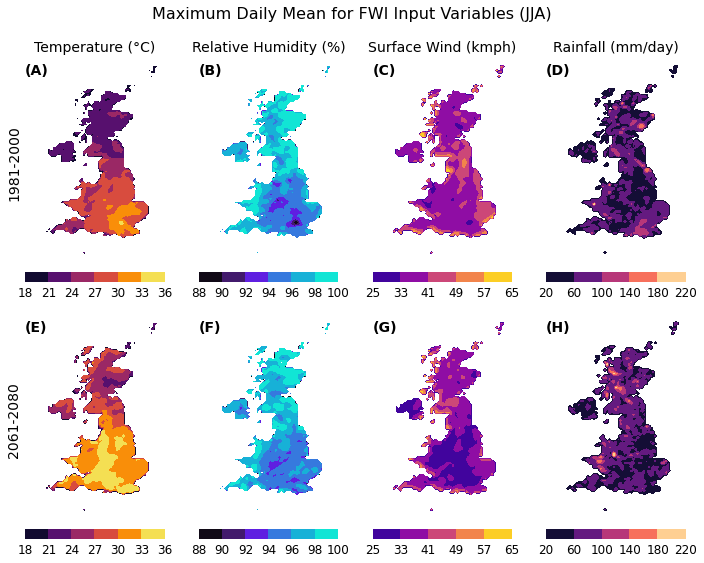

In [25]:
# Max plots:
fig, axs = plt.subplots(2,4)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.suptitle('Maximum Daily Mean for FWI Input Variables (JJA)', fontsize=16)


levels = np.linspace(18, 36, 6+1)
axs[0,0].set_title('Temperature (°C)',fontsize=14)
data00 = (tas_max_80to00*mask)[5:115,20:85]
c00 = axs[0,0].contourf(data00,cmap=plt.get_cmap('inferno'),levels=levels)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['bottom'].set_visible(False)
axs[0,0].spines['left'].set_visible(False)
axs[0,0].get_xaxis().set_ticks([])
axs[0,0].get_yaxis().set_ticks([])
axs[0,0].set_ylabel('1981-2000',fontsize=14)
axs[0,0].text(0,100, '(A)', size=14,weight='bold')
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb00 = fig.colorbar(c00, cax=cax, orientation='horizontal')
cb00.outline.set_visible(False)
cb00.ax.tick_params(length=0,labelsize=12)
data01 = (tas_max_60to80*mask)[5:115,20:85]
c01 = axs[1,0].contourf(data01,cmap=plt.get_cmap('inferno'),levels=levels)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['bottom'].set_visible(False)
axs[1,0].spines['left'].set_visible(False)
axs[1,0].get_xaxis().set_ticks([])
axs[1,0].get_yaxis().set_ticks([])
axs[1,0].set_ylabel('2061-2080',fontsize=14)
axs[1,0].text(0,100, '(E)', size=14,weight='bold')
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb01 = fig.colorbar(c01, cax=cax, orientation='horizontal')
cb01.outline.set_visible(False)
cb01.ax.tick_params(length=0,labelsize=12)


levels = np.linspace(88, 100, 6+1)
axs[0,1].set_title('Relative Humidity (%)',fontsize=14)
data10 = (hurs_max_80to00*mask)[5:115,20:85]
c10 = axs[0,1].contourf(data10,cmap=plt.get_cmap('cmr.cosmic'),levels=levels)
axs[0,1].text(0,100, '(B)', size=14,weight='bold')
axs[0,1].axis('off')
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb10 = fig.colorbar(c10, cax=cax, orientation='horizontal')
cb10.outline.set_visible(False)
cb10.ax.tick_params(length=0,labelsize=12)
data11 = (hurs_max_60to80*mask)[5:115,20:85]
c11 = axs[1,1].contourf(data11,cmap=plt.get_cmap('cmr.cosmic'),levels=levels)
axs[1,1].text(0,100, '(F)', size=14,weight='bold')
axs[1,1].axis('off')
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb11 = fig.colorbar(c11, cax=cax, orientation='horizontal')
cb11.outline.set_visible(False)
cb11.ax.tick_params(length=0,labelsize=12)


levels = np.linspace(25, 65, 5+1)
axs[0,2].set_title('Surface Wind (kmph)',fontsize=14)
data20 = (wind_max_80to00*mask)[5:115,20:85]
c20 = axs[0,2].contourf(data20,cmap=plt.get_cmap('plasma'),levels=levels)
axs[0,2].text(0,100, '(C)', size=14,weight='bold')
axs[0,2].axis('off')
divider = make_axes_locatable(axs[0,2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb20 = fig.colorbar(c20, cax=cax, orientation='horizontal')
cb20.outline.set_visible(False)
cb20.ax.tick_params(length=0,labelsize=12)
data21 = (wind_max_60to80*mask)[5:115,20:85]
c21 = axs[1,2].contourf(data21,cmap=plt.get_cmap('plasma'),levels=levels)
axs[1,2].text(0,100, '(G)', size=14,weight='bold')
axs[1,2].axis('off')
divider = make_axes_locatable(axs[1,2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb21 = fig.colorbar(c21, cax=cax, orientation='horizontal')
cb21.outline.set_visible(False)
cb21.ax.tick_params(length=0,labelsize=12)


levels = np.linspace(20, 220, 5+1)
axs[0,3].set_title('Rainfall (mm/day)',fontsize=14)
data30 = (pr_max_80to00*mask)[5:115,20:85]
c30 = axs[0,3].contourf(data30,cmap=plt.get_cmap('magma'),levels=levels)
axs[0,3].text(0,100, '(D)', size=14,weight='bold')
axs[0,3].axis('off')
divider = make_axes_locatable(axs[0,3])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb30 = fig.colorbar(c30, cax=cax, orientation='horizontal')
cb30.outline.set_visible(False)
cb30.ax.tick_params(length=0,labelsize=12)
data31 = (pr_max_60to80*mask)[5:115,20:85]
c31 = axs[1,3].contourf(data31,cmap=plt.get_cmap('magma'),levels=levels)
axs[1,3].text(0,100, '(H)', size=14,weight='bold')
axs[1,3].axis('off')
divider = make_axes_locatable(axs[1,3])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb31 = fig.colorbar(c31, cax=cax, orientation='horizontal')
cb31.outline.set_visible(False)
cb31.ax.tick_params(length=0,labelsize=12)

plt.tight_layout(pad=1.5)
plt.savefig('/home/theo/final_images/1.1.images/input_maps_max')

In [19]:
print('tas')
print(np.unique((tas_min_80to00*mask)[5:115,20:85]))
print(np.unique((tas_min_60to80*mask)[5:115,20:85]))
print('hurs')
print(np.unique((hurs_min_80to00*mask)[5:115,20:85]))
print(np.unique((hurs_min_60to80*mask)[5:115,20:85]))
print('wind')
print(np.unique((wind_min_80to00*mask)[5:115,20:85]))
print(np.unique((wind_min_60to80*mask)[5:115,20:85]))
print('pr')
print(np.unique((pr_min_80to00*mask)[5:115,20:85]))
print(np.unique((pr_min_60to80*mask)[5:115,20:85]))

tas
[0.         0.52090454 0.73428345 ... 9.561676   9.606598   9.685455  ]
[ 0.         1.6805725  1.9552307 ... 10.835602  10.908112  11.3229065]
hurs
[ 0.       23.242188 25.59375  ... 62.742188 63.007812 63.882812]
[ 0.       18.859375 19.539062 ... 62.25     62.476562 65.17969 ]
wind
[0.        1.2164062 1.51875   1.5644531 1.603125  1.6101562 1.6136718
 1.6769531 1.7015624 1.7402344 1.8       1.8105469 1.8140625 1.8351562
 1.8457031 1.8597655 1.884375  1.8984375 1.9160156 1.9230468 1.9265624
 1.940625  1.9441406 1.9546875 1.9582031 1.9722656 1.9968749 2.0003905
 2.0039062 2.0144532 2.0214844 2.0249999 2.0320313 2.0355468 2.0390625
 2.0460937 2.053125  2.0566406 2.0636718 2.070703  2.0742188 2.0882812
 2.0917969 2.098828  2.1058593 2.109375  2.1164062 2.1234374 2.1269531
 2.1304686 2.1339843 2.1480467 2.1515625 2.1550782 2.1585937 2.1621094
 2.1691406 2.1796875 2.183203  2.1867187 2.1902344 2.19375   2.1972656
 2.200781  2.211328  2.221875  2.2253907 2.2289062 2.2324219 2.2359374


In [5]:
# Getting data for periods: 1980-2000 and 2060-1980
i = 1

print(f'Stage {i}')
tas_data  = xarray.open_dataset(directories[i] + tas_files[i], engine = "netcdf4")
tas_80to00 = np.array(tas_data.tas[indices_80to00,:,:]) - 273.15
tas_60to80 = np.array(tas_data.tas[indices_60to80,:,:]) - 273.15

hurs_data  = xarray.open_dataset(directories[i] + hurs_files[i], engine = "netcdf4")
hurs_80to00 = np.array(hurs_data.hurs[indices_80to00,:,:])
hurs_60to80 = np.array(hurs_data.hurs[indices_60to80,:,:])

wind_data  = xarray.open_dataset(directories[i] + wind_files[i], engine = "netcdf4")
wind_80to00 = np.array(wind_data.sfcWind[indices_80to00,:,:])*3.6
wind_60to80 = np.array(wind_data.sfcWind[indices_60to80,:,:])*3.6

pr_data  = xarray.open_dataset(directories[i] + pr_files[i], engine = "netcdf4")
pr_80to00 = np.array(pr_data.pr[indices_80to00,:,:])*86400
pr_60to80 = np.array(pr_data.pr[indices_60to80,:,:])*86400


for i in range(2,len(directories)):
    print(f'Stage {i}')
    
    temp1 = np.array(tas_data.tas[indices_80to00,:,:]) - 273.15
    tas_80to00 = np.append(tas_80to00,temp1,axis=0)
    temp2 = np.array(tas_data.tas[indices_60to80,:,:]) - 273.15
    tas_60to80 = np.append(tas_60to80,temp2,axis=0)
    
    hurs1 = np.array(hurs_data.hurs[indices_80to00,:,:])
    hurs_80to00 = np.append(hurs_80to00,hurs1,axis=0)
    hurs2 = np.array(hurs_data.hurs[indices_60to80,:,:])
    hurs_60to80 = np.append(hurs_60to80,hurs2,axis=0)
    
    wind1 = np.array(wind_data.sfcWind[indices_80to00,:,:])*3.6
    wind_80to00 = np.append(wind_80to00,wind1,axis=0)
    wind2 = np.array(wind_data.sfcWind[indices_60to80,:,:])*3.6
    wind_60to80 = np.append(wind_60to80,wind2,axis=0)
    
    pr1 = np.array(pr_data.pr[indices_80to00,:,:])*86400
    pr_80to00 = np.append(pr_80to00,pr1,axis=0)
    pr2 = np.array(pr_data.pr[indices_60to80,:,:])*86400
    pr_60to80 = np.append(pr_60to80,pr2,axis=0)
    
    del temp1,temp2,hurs1,hurs2,wind1,wind2,pr1,pr2
# Making mean over models data
tas_mean_80to00 = np.mean(tas_80to00,axis=0)
tas_mean_60to80 = np.mean(tas_60to80,axis=0)

hurs_mean_80to00 = np.mean(hurs_80to00,axis=0)
hurs_mean_60to80 = np.mean(hurs_60to80,axis=0)

wind_mean_80to00 = np.mean(wind_80to00,axis=0)
wind_mean_60to80 = np.mean(wind_60to80,axis=0)

pr_mean_80to00 = np.mean(pr_80to00,axis=0)
pr_mean_60to80 = np.mean(pr_60to80,axis=0)
# Making max over models data
tas_max_80to00 = np.max(tas_80to00,axis=0)
tas_max_60to80 = np.max(tas_60to80,axis=0)

hurs_max_80to00 = np.max(hurs_80to00,axis=0)
hurs_max_60to80 = np.max(hurs_60to80,axis=0)

wind_max_80to00 = np.max(wind_80to00,axis=0)
wind_max_60to80 = np.max(wind_60to80,axis=0)

pr_max_80to00 = np.max(pr_80to00,axis=0)
pr_max_60to80 = np.max(pr_60to80,axis=0)

NameError: name 'tas_80to00' is not defined

NameError: name 'tas_mean_80to00' is not defined

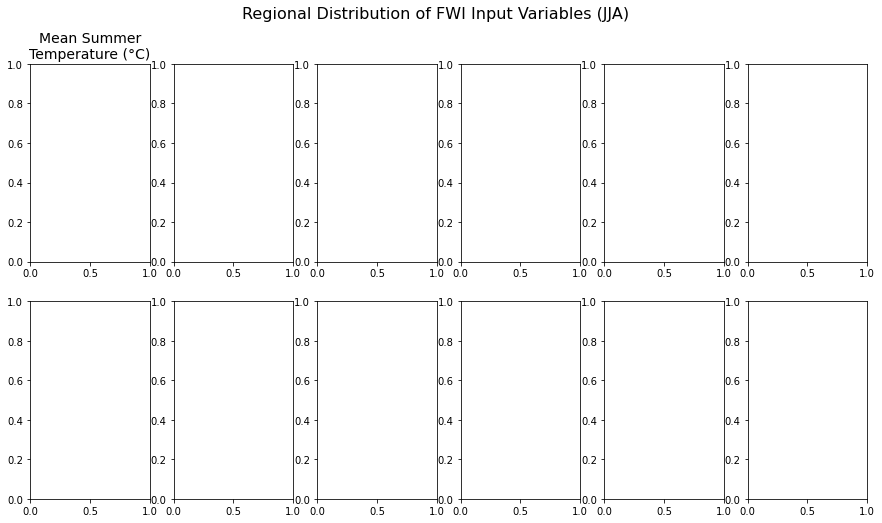

In [4]:
# Mean plots:
fig, axs = plt.subplots(2,6)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Regional Distribution of FWI Input Variables (JJA)', fontsize=16)


levels = np.linspace(10, 22, 6+1)
axs[0,0].set_title('Mean Summer\nTemperature (°C)',fontsize=14)
data00 = (tas_mean_80to00*mask)[5:115,20:85]
c00 = axs[0,0].contourf(data00,cmap=plt.get_cmap('inferno'),levels=levels)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['bottom'].set_visible(False)
axs[0,0].spines['left'].set_visible(False)
axs[0,0].get_xaxis().set_ticks([])
axs[0,0].get_yaxis().set_ticks([])
axs[0,0].set_ylabel('1981-2000',fontsize=14)
axs[0,0].text(0,100, '(A)', size=14,weight='bold')
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb00 = fig.colorbar(c00, cax=cax, orientation='horizontal')
cb00.outline.set_visible(False)
cb00.ax.tick_params(length=0,labelsize=12)
cb00.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb00.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data01 = (tas_mean_60to80*mask)[5:115,20:85]
c01 = axs[1,0].contourf(data01,cmap=plt.get_cmap('inferno'),levels=levels)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['bottom'].set_visible(False)
axs[1,0].spines['left'].set_visible(False)
axs[1,0].get_xaxis().set_ticks([])
axs[1,0].get_yaxis().set_ticks([])
axs[1,0].set_ylabel('2061-2080',fontsize=14)
axs[1,0].text(0,100, '(G)', size=14,weight='bold')
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb01 = fig.colorbar(c01, cax=cax, orientation='horizontal')
cb01.outline.set_visible(False)
cb01.ax.tick_params(length=0,labelsize=12)
cb01.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb01.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


levels = np.linspace(55, 85, 6+1)
axs[0,1].set_title('Mean Summer\nRelative Humidity (%)',fontsize=14)
data10 = (hurs_mean_80to00*mask)[5:115,20:85]
c10 = axs[0,1].contourf(data10,cmap=plt.get_cmap('cmr.cosmic'),levels=levels)
axs[0,1].text(0,100, '(B)', size=14,weight='bold')
axs[0,1].axis('off')
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb10 = fig.colorbar(c10, cax=cax, orientation='horizontal')
cb10.outline.set_visible(False)
cb10.ax.tick_params(length=0,labelsize=12)
data11 = (hurs_mean_60to80*mask)[5:115,20:85]
c11 = axs[1,1].contourf(data11,cmap=plt.get_cmap('cmr.cosmic'),levels=levels)
axs[1,1].text(0,100, '(H)', size=14,weight='bold')
axs[1,1].axis('off')
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb11 = fig.colorbar(c11, cax=cax, orientation='horizontal')
cb11.outline.set_visible(False)
cb11.ax.tick_params(length=0,labelsize=12)



levels = np.linspace(8, 24, 6+1)
axs[0,2].set_title('Mean Summer\nSurface Wind (kmph)',fontsize=14)
data20 = (wind_mean_80to00*mask)[5:115,20:85]
c20 = axs[0,2].contourf(data20,cmap=plt.get_cmap('plasma'),levels=levels)
axs[0,2].text(0,100, '(C)', size=14,weight='bold')
axs[0,2].axis('off')
divider = make_axes_locatable(axs[0,2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb20 = fig.colorbar(c20, cax=cax, orientation='horizontal')
cb20.outline.set_visible(False)
cb20.ax.tick_params(length=0,labelsize=12)
cb20.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb20.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data21 = (wind_mean_60to80*mask)[5:115,20:85]
c21 = axs[1,2].contourf(data21,cmap=plt.get_cmap('plasma'),levels=levels)
axs[1,2].text(0,100, '(I)', size=14,weight='bold')
axs[1,2].axis('off')
divider = make_axes_locatable(axs[1,2])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb21 = fig.colorbar(c21, cax=cax, orientation='horizontal')
cb21.outline.set_visible(False)
cb21.ax.tick_params(length=0,labelsize=12)
cb21.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb21.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


levels = np.linspace(1, 7, 6+1)
axs[0,3].set_title('Mean Summer\nRainfall (mm/day)',fontsize=14)
data30 = (pr_mean_80to00*mask)[5:115,20:85]
c30 = axs[0,3].contourf(data30,cmap=plt.get_cmap('magma'),levels=levels)
axs[0,3].text(0,100, '(D)', size=14,weight='bold')
axs[0,3].axis('off')
divider = make_axes_locatable(axs[0,3])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb30 = fig.colorbar(c30, cax=cax, orientation='horizontal')
cb30.outline.set_visible(False)
cb30.ax.tick_params(length=0,labelsize=12)
cb30.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb30.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data31 = (pr_mean_60to80*mask)[5:115,20:85]
c31 = axs[1,3].contourf(data31,cmap=plt.get_cmap('magma'),levels=levels)
axs[1,3].text(0,100, '(J)', size=14,weight='bold')
axs[1,3].axis('off')
divider = make_axes_locatable(axs[1,3])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb31 = fig.colorbar(c31, cax=cax, orientation='horizontal')
cb31.outline.set_visible(False)
cb31.ax.tick_params(length=0,labelsize=12)
cb31.ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cb31.ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


levels = np.linspace(18, 36, 6+1)
axs[0,4].set_title('Maximum Summer\nTemperature (°C)',fontsize=14)
data40 = (tas_max_80to00*mask)[5:115,20:85]
c40 = axs[0,4].contourf(data40,cmap=plt.get_cmap('inferno'),levels=levels)
axs[0,4].spines['top'].set_visible(False)
axs[0,4].spines['right'].set_visible(False)
axs[0,4].spines['bottom'].set_visible(False)
axs[0,4].spines['left'].set_visible(False)
axs[0,4].get_xaxis().set_ticks([])
axs[0,4].get_yaxis().set_ticks([])
axs[0,4].text(0,100, '(E)', size=14,weight='bold')
divider = make_axes_locatable(axs[0,4])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb40 = fig.colorbar(c40, cax=cax, orientation='horizontal')
cb40.outline.set_visible(False)
cb40.ax.tick_params(length=0,labelsize=12)
data41 = (tas_max_60to80*mask)[5:115,20:85]
c41 = axs[1,4].contourf(data41,cmap=plt.get_cmap('inferno'),levels=levels)
axs[1,4].spines['top'].set_visible(False)
axs[1,4].spines['right'].set_visible(False)
axs[1,4].spines['bottom'].set_visible(False)
axs[1,4].spines['left'].set_visible(False)
axs[1,4].get_xaxis().set_ticks([])
axs[1,4].get_yaxis().set_ticks([])
axs[1,4].text(0,100, '(K)', size=14,weight='bold')
divider = make_axes_locatable(axs[1,4])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb41 = fig.colorbar(c41, cax=cax, orientation='horizontal')
cb41.outline.set_visible(False)
cb41.ax.tick_params(length=0,labelsize=12)


levels = np.linspace(25, 65, 5+1)
axs[0,5].set_title('Maximum Summer\nSurface Wind (kmph)',fontsize=14)
data50 = (wind_max_80to00*mask)[5:115,20:85]
c50 = axs[0,5].contourf(data50,cmap=plt.get_cmap('plasma'),levels=levels)
axs[0,5].text(0,100, '(F)', size=14,weight='bold')
axs[0,5].axis('off')
divider = make_axes_locatable(axs[0,5])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb50 = fig.colorbar(c50, cax=cax, orientation='horizontal')
cb50.outline.set_visible(False)
cb50.ax.tick_params(length=0,labelsize=12)
data51 = (wind_max_60to80*mask)[5:115,20:85]
c51 = axs[1,5].contourf(data51,cmap=plt.get_cmap('plasma'),levels=levels)
axs[1,5].text(0,100, '(L)', size=14,weight='bold')
axs[1,5].axis('off')
divider = make_axes_locatable(axs[1,5])
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cb51 = fig.colorbar(c51, cax=cax, orientation='horizontal')
cb51.outline.set_visible(False)
cb51.ax.tick_params(length=0,labelsize=12)


plt.tight_layout(pad=1.5)
plt.savefig('/home/theo/final_images/1.1.images/combo_maps')